In [1]:
try:
  import google.colab
  IS_COLAB_ENV = True
except:
  IS_COLAB_ENV = False
IS_COLAB_ENV

True

In [2]:
if IS_COLAB_ENV:
    !pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 52kB/s 
     |████████████████████████████████| 3.8MB 45.1MB/s 
     |████████████████████████████████| 51kB 5.7MB/s 
     |████████████████████████████████| 450kB 34.4MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=35b20d0e182e92a1343471c265b5e291869af8e28d87a2f555a1eb54f0292d36
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.4.0
    Uninstalling tensorboard-2.4.0:
      Successfully uninstalled tensorboard-2.4.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tenso

In [3]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  661k  100  661k    0     0  1868k      0 --:--:-- --:--:-- --:--:-- 1868k


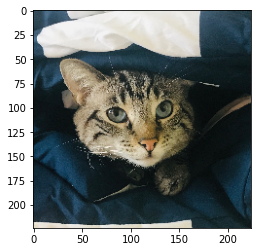

In [4]:
!curl https://raw.githubusercontent.com/PracticalDL/Practical-Deep-Learning-Book/master/sample-images/cat.jpg --output cat.jpg
img_path = 'cat.jpg'
img = image.load_img(img_path, target_size=(224,224))
plt.imshow(img)
plt.show()

In [6]:
#pretrained model requires resizing our image to 224x224 pixels
#pretrained models require batch of images as input, so when only one image is available, the dimension needs to be changes from 3 to 4 -> expand_dims

In [7]:
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array,axis=0)

In [8]:
model = tf.keras.applications.resnet50.ResNet50()

102973440/102967424 [==============================] - 1s 0us/step


In [9]:
# decode_predictions function gives the probability of each category of objects contained in the image

In [10]:
def classify(img_path):
  img = image.load_img(img_path, target_size=(224,224))
  img_array = image.img_to_array(img)
  img_batch = np.expand_dims(img_array,axis=0)
  img_preprocessed = preprocess_input(img_batch)
  prediction = model.predict(img_preprocessed)
  print(decode_predictions(prediction,top=3)[0])

In [12]:
classify(img_path) #test 1

[('n02123045', 'tabby', 0.5681726), ('n02124075', 'Egyptian_cat', 0.22223175), ('n02123159', 'tiger_cat', 0.061033934)]


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2231k  100 2231k    0     0  5766k      0 --:--:-- --:--:-- --:--:-- 5751k


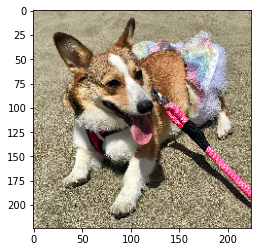

In [23]:
!curl https://raw.githubusercontent.com/PracticalDL/Practical-Deep-Learning-Book/master/sample-images/dog.jpg --output dog.jpg
img_path = 'dog.jpg'
img = image.load_img(img_path,target_size=(224,224))
plt.imshow(img)
plt.show()

In [22]:
classify(img_path)

[('n02113186', 'Cardigan', 0.8349495), ('n02113023', 'Pembroke', 0.15549397), ('n02110806', 'basenji', 0.0027703466)]


In [25]:
# dataset to be used: ResNet50 
# overlay a class activation map (or a heatmap) on top of the video in order to understand what the network pays attention to 

In [26]:
pip install keras-vis --user

# Creating heat map for the image :

In [31]:
!pip install tensorflow-gpu==2.0.0
!pip install tf-explain==0.1.0

     |████████████████████████████████| 380.8MB 42kB/s 


In [32]:
from tf_explain.core.grad_cam import GradCAM
from tf_explain.core.occlusion_sensitivity import OcclusionSensitivity
from tf_explain.core.activations import ExtractActivations

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

%matplotlib inline

Pass an image, its ImageNet object ID along with a model into tf-explain’s functions. The object id is needed as tf.explain needs to figure out what is activated for that particular class.


In [33]:
def download_sample_image(filename):
    import requests
    url = f'https://raw.githubusercontent.com/PracticalDL/Practical-Deep-Learning-Book/master/sample-images/{filename}'
    open(filename, 'wb').write(requests.get(url).content)

In [34]:
if IS_COLAB_ENV:
    IMAGE_PATHS = ['dog.jpg', 'cat.jpg']
    for each_filename in IMAGE_PATHS:
        download_sample_image(each_filename)
else:
    IMAGE_PATHS = [ '../../sample-images/dog.jpg', '../../sample-images/cat.jpg']

In [35]:
def display_images(paths):
  # figure size in inches optional
  rcParams['figure.figsize'] = 11 ,8
  
  # read images
  img_A = mpimg.imread(paths[0])
  img_B = mpimg.imread(paths[-1])
  
  # display images
  fig, ax = plt.subplots(1,2)
  ax[0].imshow(img_A);
  ax[1].imshow(img_B);

553467904/553467096 [==============================] - 7s 0us/step


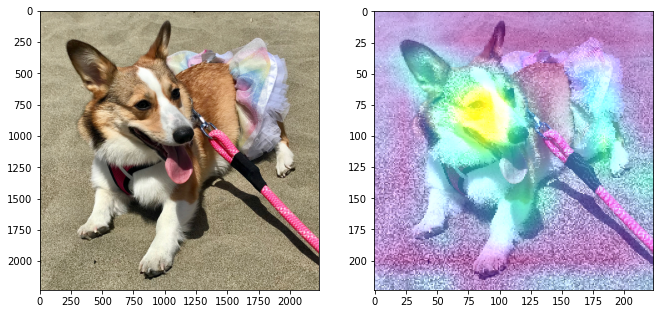

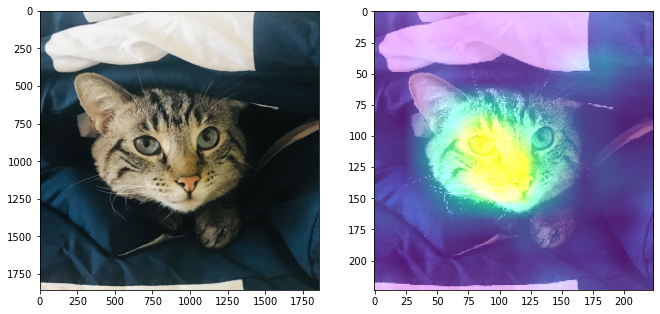

In [36]:
indices = [263, 281]

layers_name = ['activation_6']

from IPython.display import Image

for i in range(len(IMAGE_PATHS)):
    each_path = IMAGE_PATHS[i]
    index = indices[i]

    img = tf.keras.preprocessing.image.load_img(each_path,
                                                target_size=(224, 224))
    img = tf.keras.preprocessing.image.img_to_array(img)
    data = ([img], None)
    # Define name with which to save the result as
    name = each_path.split("/")[-1].split(".jpg")[0]

    #Save the Grad Cam visualization
    explainer = GradCAM()
    model = tf.keras.applications.vgg16.VGG16(weights='imagenet',
                                              include_top=True)
    grid = explainer.explain(data, model, 'block5_conv3', index)
    explainer.save(grid, '.', name + 'grad_cam.png')
    display_images([each_path, name + 'grad_cam.png'])

In [40]:
# use ffmpeg to split up the video into individual frames (at 25 frames per sec) and get heat map on each of the frames.